In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

file_path='Data/SFF.xlsx'
# Read the XLSX file into a DataFrame
df = pd.read_excel(file_path)


df.columns=df.iloc[10]
df= df.iloc[11:]
df_mask = df["Product"] == "Total"
df= df[df_mask]
df.drop(columns=["Product"], inplace=True)
df["Country"]=df['Country'].str.replace(' ', '')
df["Country"]=df['Country'].str.replace('Taipei', 'Taiwan')
df["Country"]=df['Country'].str.replace('Korea', 'SouthKorea')

# Reshape the DataFrame using melt
df = pd.melt(df, id_vars=['Country'], var_name='Year', value_name='Subsidy_FF')


country_list= df["Country"].unique()
print(country_list)
df

['Algeria' 'Angola' 'Argentina' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Bolivia' 'Brunei' 'China' 'Colombia' 'Ecuador' 'Egypt' 'ElSalvador'
 'Gabon' 'Ghana' 'India' 'Indonesia' 'Iraq' 'Iran' 'Kazakhstan'
 'SouthKorea' 'Kuwait' 'Libya' 'Malaysia' 'Mexico' 'Nigeria' 'Oman'
 'Pakistan' 'Qatar' 'Russia' 'SaudiArabia' 'SouthAfrica' 'SriLanka'
 'Taiwan' 'Thailand' 'TrinidadandTobago' 'Turkmenistan' 'Ukraine' 'UAE'
 'Uzbekistan' 'Venezuela' 'Vietnam' 'France' 'UnitedKingdom' 'Austria'
 'Hungary' 'Poland' 'SlovakRepublic' 'Croatia']


,Country,Year,Subsidy_FF
0,Algeria,2010.0,12757.799698
1,Angola,2010.0,1399.902315
2,Argentina,2010.0,10356.896119
3,Azerbaijan,2010.0,1216.104034
4,Bahrain,2010.0,2409.759166
...,...,...,...
632,Austria,2022.0,1169.585631
633,Hungary,2022.0,4934.684626
634,Poland,2022.0,2968.581075
635,SlovakRepublic,2022.0,1057.435251


In [5]:
# Read Energy consumption per capita
file_path = 'Data/primary-energy-cons.csv'

# Read the CSV file into a DataFrame
primary_energy_df = pd.read_csv(file_path)

# Display the DataFrame
#primary_energy_df.drop(columns=['Code'], inplace=True)
primary_energy_df.rename(columns={"Entity" : "Country"}, inplace=True)
primary_energy_df["Country"]=primary_energy_df['Country'].str.replace(' ', '')
primary_energy_df["Country"]=primary_energy_df['Country'].str.replace('UnitedArabEmirates', 'UAE')
primary_energy_df["Country"]=primary_energy_df['Country'].str.replace('Slovakia', 'SlovakRepublic')
primary_energy_df

df=df.merge(primary_energy_df[["Country","Year","Primary energy consumption (TWh)"]], on=['Country','Year'], how='left')
df["Subsidy_FF_per_Twh"]= df["Subsidy_FF"]/df["Primary energy consumption (TWh)"]
df

,Country,Year,Subsidy_FF,Primary energy consumption (TWh),Subsidy_FF_per_Twh
0,Algeria,2010.0,12757.799698,438.99487,29.061387
1,Angola,2010.0,1399.902315,83.17874,16.830050
2,Argentina,2010.0,10356.896119,883.96924,11.716354
3,Azerbaijan,2010.0,1216.104034,128.94139,9.431448
4,Bahrain,2010.0,2409.759166,172.23476,13.991131
...,...,...,...,...,...
632,Austria,2022.0,1169.585631,381.59094,3.065025
633,Hungary,2022.0,4934.684626,265.73322,18.570070
634,Poland,2022.0,2968.581075,1198.32180,2.477282
635,SlovakRepublic,2022.0,1057.435251,191.24365,5.529257


In [6]:
# Read Energy consumption per capita
file_path = 'Data/per-capita-energy-use.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path)

# Display the DataFrame
#df2.drop(columns=['Code'], inplace=True)
df2.rename(columns={"Entity" : "Country"}, inplace=True)
df2["Country"]=df2['Country'].str.replace(' ', '')
df2["Country"]=df2['Country'].str.replace('UnitedArabEmirates', 'UAE')
df2["Country"]=df2['Country'].str.replace('Slovakia', 'SlovakRepublic')

# Sort the DataFrame by 'Country' and 'Year'
df2.sort_values(by=['Country', 'Year'], inplace=True)
print(df.columns)

# Calculate the variation of primary energy consumption
df2['Energy_Variation'] = df2.groupby('Country')['Primary energy consumption per capita (kWh/person)'].diff()
df2.rename(columns={'Primary energy consumption per capita (kWh/person)':'Energy_per_capita'},inplace=True)
df2


Index(['Country', 'Year', 'Subsidy_FF', 'Primary energy consumption (TWh)',
       'Subsidy_FF_per_Twh'],
      dtype='object')


,Country,Code,Year,Energy_per_capita,Energy_Variation
0,Afghanistan,AFG,1980,623.92865,NaN
1,Afghanistan,AFG,1981,786.83690,162.90825
2,Afghanistan,AFG,1982,926.65125,139.81435
3,Afghanistan,AFG,1983,1149.19590,222.54465
4,Afghanistan,AFG,1984,1121.57290,-27.62300
...,...,...,...,...,...
10599,Zimbabwe,ZWE,2017,3068.01150,-159.66870
10600,Zimbabwe,ZWE,2018,3441.98580,373.97430
10601,Zimbabwe,ZWE,2019,3003.65530,-438.33050
10602,Zimbabwe,ZWE,2020,2680.13180,-323.52350


In [7]:
merge_df=df.merge(df2, on=['Country','Year'], how='left')
merge_df.tail(50)

,Country,Year,Subsidy_FF,Primary energy consumption (TWh),Subsidy_FF_per_Twh,Code,Energy_per_capita,Energy_Variation
587,Croatia,2021.0,0.000000,98.31208,0.000000,HRV,24213.9690,1909.5220
588,Algeria,2022.0,49842.336435,684.86975,72.776373,DZA,15252.1270,-662.3340
589,Angola,2022.0,5227.861290,NaN,NaN,NaN,NaN,NaN
590,Argentina,2022.0,20211.610365,1000.97327,20.191958,ARG,21994.4220,666.2360
591,Azerbaijan,2022.0,11240.239585,194.19240,57.881975,AZE,18747.9180,-226.4160
592,Bahrain,2022.0,4117.084399,NaN,NaN,NaN,NaN,NaN
593,Bangladesh,2022.0,25908.177765,498.50290,51.971970,BGD,2912.0479,80.8860
594,Bolivia,2022.0,3356.550606,NaN,NaN,NaN,NaN,NaN
595,Brunei,2022.0,1004.289281,NaN,NaN,NaN,NaN,NaN
596,China,2022.0,103549.213319,44275.91400,2.338726,CHN,31051.4800,282.6540


In [8]:
# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'Data/growth.csv'

# Read the CSV file into a DataFrame
growth_df = pd.read_csv(file_path)

# Display the DataFrame
growth_df.drop(columns=["Unnamed: 67","Indicator Name","Indicator Code"], inplace=True)
growth_df.rename(columns={"Country Name": "Country", "Country Code": "Code"}, inplace=True)
growth_df["Country"]=growth_df['Country'].str.replace(' ', '')
growth_df["Country"]=growth_df['Country'].str.replace('BruneiDarussalam', 'Brunei')
growth_df["Country"]=growth_df['Country'].str.replace('Egypt,ArabRep.', 'Egypt')

# Reshape the DataFrame using melt
growth_df = pd.melt(growth_df, id_vars=['Country','Code'], var_name='Year', value_name='Growth')
growth_df['Year'] = growth_df['Year'].astype('int64')
growth_df.head(50)

,Country,Code,Year,Growth
0,Aruba,ABW,1960,NaN
1,AfricaEasternandSouthern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,AfricaWesternandCentral,AFW,1960,NaN
4,Angola,AGO,1960,NaN
5,Albania,ALB,1960,NaN
6,Andorra,AND,1960,NaN
7,ArabWorld,ARB,1960,NaN
8,UnitedArabEmirates,ARE,1960,NaN
9,Argentina,ARG,1960,NaN


In [9]:
merge_2_df=merge_df.merge(growth_df, on=['Country','Year'], how='left')
merge_2_df.drop(columns=["Code_y"], inplace=True)
merge_2_df.rename(columns={"Code_x":"Code"}, inplace=True)
merge_2_df= merge_2_df.merge(growth_df, on=['Code','Year'], how='left')
merge_2_df.drop(columns=["Country_y"], inplace=True)
merge_2_df.rename(columns={"Country_x":"Country"}, inplace=True)


# Use numpy.where to compare two columns and choose the non-empty one
merge_2_df['Growth'] = np.where(merge_2_df['Growth_x'].notna(), merge_2_df['Growth_x'], merge_2_df['Growth_y'])
merge_2_df.drop(columns=["Growth_y","Growth_x"], inplace=True)
merge_2_df.head(50)

,Country,Year,Subsidy_FF,Primary energy consumption (TWh),Subsidy_FF_per_Twh,Code,Energy_per_capita,Energy_Variation,Growth
0,Algeria,2010.0,12757.799698,438.994870,29.061387,DZA,12243.1560,-509.9640,3.600000
1,Angola,2010.0,1399.902315,83.178740,16.830050,AGO,3560.0942,191.2585,4.398376
2,Argentina,2010.0,10356.896119,883.969240,11.716354,ARG,21507.7030,553.4320,10.125398
3,Azerbaijan,2010.0,1216.104034,128.941390,9.431448,AZE,13958.9220,-390.0000,5.048945
4,Bahrain,2010.0,2409.759166,172.234760,13.991131,BHR,141914.1000,-2534.2400,4.334299
5,Bangladesh,2010.0,7590.533358,250.177140,30.340635,BGD,1685.9304,24.9581,5.571788
6,Bolivia,2010.0,0.000000,67.463234,0.000000,BOL,6598.9834,-15.8396,4.126723
7,Brunei,2010.0,427.316391,42.422886,10.072780,BRN,107111.1900,11690.8000,2.598966
8,China,2010.0,49292.970194,29055.610000,1.696504,CHN,21551.5470,1270.4790,10.635871
9,Colombia,2010.0,140.810290,424.601000,0.331630,COL,9474.2960,362.4350,4.494659


In [10]:
file_path='Data/pwt1001.xlsx'
# Read the XLSX file into a DataFrame
capital_labor_df = pd.read_excel(file_path, sheet_name=2)
capital_labor_df.rename(columns={"countrycode":"Code", "country": "Country", "year": "Year"}, inplace=True)
selected_columns= ["Code","Country","Year","emp","rnna"]
capital_labor_df= capital_labor_df[selected_columns]
capital_labor_df["Country"]=capital_labor_df['Country'].str.replace(' ', '')
capital_labor_df

,Code,Country,Year,emp,rnna
0,ABW,Aruba,1950,NaN,NaN
1,ABW,Aruba,1951,NaN,NaN
2,ABW,Aruba,1952,NaN,NaN
3,ABW,Aruba,1953,NaN,NaN
4,ABW,Aruba,1954,NaN,NaN
...,...,...,...,...,...
12805,ZWE,Zimbabwe,2015,6.393752,53550.226562
12806,ZWE,Zimbabwe,2016,6.504374,55167.007812
12807,ZWE,Zimbabwe,2017,6.611773,56829.140625
12808,ZWE,Zimbabwe,2018,6.714952,58552.808594


In [11]:
merge_3_df=merge_2_df.merge(capital_labor_df, on=['Country','Year'], how='left')
merge_3_df.drop(columns=["Code_y"], inplace=True)
merge_3_df.rename(columns={"Code_x":"Code"}, inplace=True)
merge_3_df= merge_3_df.merge(capital_labor_df, on=['Code','Year'], how='left')
merge_3_df.drop(columns=["Country_y"], inplace=True)
merge_3_df.rename(columns={"Country_x":"Country"}, inplace=True)


# Use numpy.where to compare two columns and choose the non-empty one
merge_3_df['emp'] = np.where(merge_3_df['emp_x'].notna(), merge_3_df['emp_x'], merge_3_df['emp_y'])
merge_3_df.drop(columns=["emp_x","emp_y"], inplace=True)

merge_3_df['rnna'] = np.where(merge_3_df['rnna_x'].notna(), merge_3_df['rnna_x'], merge_3_df['rnna_y'])
merge_3_df.drop(columns=["rnna_x","rnna_y"], inplace=True)

merge_3_df["Development"]= merge_3_df["rnna"]/merge_3_df["emp"]
merge_3_df

,Country,Year,Subsidy_FF,Primary energy consumption (TWh),Subsidy_FF_per_Twh,Code,Energy_per_capita,Energy_Variation,Growth,emp,rnna,Development
0,Algeria,2010.0,12757.799698,438.99487,29.061387,DZA,12243.1560,-509.9640,3.600000,9.781852,1.493481e+06,152678.734594
1,Angola,2010.0,1399.902315,83.17874,16.830050,AGO,3560.0942,191.2585,4.398376,11.977833,1.013858e+06,84644.532940
2,Argentina,2010.0,10356.896119,883.96924,11.716354,ARG,21507.7030,553.4320,10.125398,18.076746,2.575677e+06,142485.655431
3,Azerbaijan,2010.0,1216.104034,128.94139,9.431448,AZE,13958.9220,-390.0000,5.048945,4.377379,1.233235e+05,28172.904477
4,Bahrain,2010.0,2409.759166,172.23476,13.991131,BHR,141914.1000,-2534.2400,4.334299,0.591442,2.452998e+05,414748.393448
...,...,...,...,...,...,...,...,...,...,...,...,...
632,Austria,2022.0,1169.585631,381.59094,3.065025,AUT,42685.3800,-2555.6700,4.806430,NaN,NaN,NaN
633,Hungary,2022.0,4934.684626,265.73322,18.570070,HUN,26660.4900,-2587.2070,4.554557,NaN,NaN,NaN
634,Poland,2022.0,2968.581075,1198.32180,2.477282,POL,30065.4200,-1935.6540,5.260364,NaN,NaN,NaN
635,SlovakRepublic,2022.0,1057.435251,191.24365,5.529257,SVK,33887.6900,-1948.7160,1.750448,NaN,NaN,NaN


In [12]:
# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'Data/growth.csv'

# Read the CSV file into a DataFrame
growth_world_df = pd.read_csv(file_path)

# Display the DataFrame
growth_world_df.drop(columns=["Unnamed: 67","Indicator Name","Indicator Code"], inplace=True)
growth_world_df.rename(columns={"Country Name": "Country", "Country Code": "Code"}, inplace=True)
growth_world_df["Country"]=growth_world_df['Country'].str.replace(' ', '')
growth_world_df["Country"]=growth_world_df['Country'].str.replace('BruneiDarussalam', 'Brunei')
growth_world_df["Country"]=growth_world_df['Country'].str.replace('Egypt,ArabRep.', 'Egypt')

# Reshape the DataFrame using melt
growth_world_df = pd.melt(growth_world_df, id_vars=['Country','Code'], var_name='Year', value_name='Growth')
growth_world_df['Year'] = growth_world_df['Year'].astype('int64')

df_mask = growth_world_df["Country"] == "World"
growth_world_df= growth_world_df[df_mask]
growth_world_df.drop(columns=["Country", "Code"], inplace=True)
growth_world_df.rename(columns={"Growth":"World Growth"},inplace=True)

In [14]:
merge_4_df=merge_3_df.merge(growth_world_df, on=['Year'], how='left')
merge_4_df

,Country,Year,Subsidy_FF,Primary energy consumption (TWh),Subsidy_FF_per_Twh,Code,Energy_per_capita,Energy_Variation,Growth,emp,rnna,Development,World Growth
0,Algeria,2010.0,12757.799698,438.99487,29.061387,DZA,12243.1560,-509.9640,3.600000,9.781852,1.493481e+06,152678.734594,4.527807
1,Angola,2010.0,1399.902315,83.17874,16.830050,AGO,3560.0942,191.2585,4.398376,11.977833,1.013858e+06,84644.532940,4.527807
2,Argentina,2010.0,10356.896119,883.96924,11.716354,ARG,21507.7030,553.4320,10.125398,18.076746,2.575677e+06,142485.655431,4.527807
3,Azerbaijan,2010.0,1216.104034,128.94139,9.431448,AZE,13958.9220,-390.0000,5.048945,4.377379,1.233235e+05,28172.904477,4.527807
4,Bahrain,2010.0,2409.759166,172.23476,13.991131,BHR,141914.1000,-2534.2400,4.334299,0.591442,2.452998e+05,414748.393448,4.527807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,Austria,2022.0,1169.585631,381.59094,3.065025,AUT,42685.3800,-2555.6700,4.806430,NaN,NaN,NaN,3.089379
633,Hungary,2022.0,4934.684626,265.73322,18.570070,HUN,26660.4900,-2587.2070,4.554557,NaN,NaN,NaN,3.089379
634,Poland,2022.0,2968.581075,1198.32180,2.477282,POL,30065.4200,-1935.6540,5.260364,NaN,NaN,NaN,3.089379
635,SlovakRepublic,2022.0,1057.435251,191.24365,5.529257,SVK,33887.6900,-1948.7160,1.750448,NaN,NaN,NaN,3.089379


In [15]:
# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'Data/co2_intensity.csv'

# Read the CSV file into a DataFrame
carbon_intensity_df = pd.read_csv(file_path)

# Display the DataFrame
carbon_intensity_df.drop(columns=["Unnamed: 67","Indicator Name","Indicator Code"], inplace=True)
carbon_intensity_df.rename(columns={"Country Name": "Country", "Country Code": "Code"}, inplace=True)
carbon_intensity_df["Country"]=carbon_intensity_df['Country'].str.replace(' ', '')
carbon_intensity_df["Country"]=carbon_intensity_df['Country'].str.replace('BruneiDarussalam', 'Brunei')
carbon_intensity_df["Country"]=carbon_intensity_df['Country'].str.replace('Egypt,ArabRep.', 'Egypt')

# Reshape the DataFrame using melt
carbon_intensity_df = pd.melt(carbon_intensity_df, id_vars=['Country','Code'], var_name='Year', value_name='Carbon Intensity')
carbon_intensity_df['Year'] = carbon_intensity_df['Year'].astype('int64')

carbon_intensity_df

,Country,Code,Year,Carbon Intensity
0,Aruba,ABW,1960,NaN
1,AfricaEasternandSouthern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,AfricaWesternandCentral,AFW,1960,NaN
4,Angola,AGO,1960,NaN
...,...,...,...,...
16753,Kosovo,XKX,2022,NaN
16754,"Yemen,Rep.",YEM,2022,NaN
16755,SouthAfrica,ZAF,2022,NaN
16756,Zambia,ZMB,2022,NaN


In [16]:
merge_5_df=merge_4_df.merge(carbon_intensity_df, on=['Country','Year'], how='left')
merge_5_df.drop(columns=["Code_y"], inplace=True)
merge_5_df.rename(columns={"Code_x":"Code"}, inplace=True)
merge_5_df= merge_5_df.merge(carbon_intensity_df, on=['Code','Year'], how='left')
merge_5_df.drop(columns=["Country_y"], inplace=True)
merge_5_df.rename(columns={"Country_x":"Country"}, inplace=True)

# Use numpy.where to compare two columns and choose the non-empty one
merge_5_df['Carbon Intensity'] = np.where(merge_5_df['Carbon Intensity_x'].notna(), merge_5_df['Carbon Intensity_x'], merge_5_df['Carbon Intensity_y'])
merge_5_df.drop(columns=["Carbon Intensity_x","Carbon Intensity_y"], inplace=True)


merge_5_df.iloc[200:400]

,Country,Year,Subsidy_FF,Primary energy consumption (TWh),Subsidy_FF_per_Twh,Code,Energy_per_capita,Energy_Variation,Growth,emp,rnna,Development,World Growth,Carbon Intensity
200,Bahrain,2014.0,2639.152231,201.823550,13.076533,BHR,153929.6000,-7435.9300,4.350391,0.667045,3.086569e+05,462723.008720,3.067008,0.443534
201,Bangladesh,2014.0,4318.021178,318.270000,13.567164,BGD,2040.6984,49.5288,6.061059,59.445442,1.761698e+06,29635.547904,3.067008,0.106370
202,Bolivia,2014.0,2174.913380,84.832420,25.637762,BOL,7770.6777,-43.0127,5.460570,4.967583,1.564145e+05,31487.048248,3.067008,0.257806
203,Brunei,2014.0,355.706065,44.308376,8.027964,BRN,106339.2500,10645.6250,-2.508353,0.190163,1.582759e+05,832318.065487,3.067008,0.212340
204,China,2014.0,29690.162092,34729.508000,0.854897,CHN,25072.0230,471.6630,7.425764,794.645630,6.212015e+07,78173.401657,3.067008,0.585298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Azerbaijan,2018.0,4187.020986,171.549640,24.407052,AZE,16897.2400,284.6030,1.500000,5.031527,2.464766e+05,48986.439241,3.276283,0.226280
396,Bahrain,2018.0,507.673589,211.636690,2.398798,BHR,142291.5000,-1174.7500,2.111130,0.755234,3.866877e+05,512010.714943,3.276283,0.413814
397,Bangladesh,2018.0,3571.970584,430.493350,8.297389,BGD,2630.0278,135.9128,7.319408,64.341400,2.500788e+06,38867.478704,3.276283,0.111698
398,Bolivia,2018.0,1197.492221,93.880630,12.755477,BOL,8088.3423,150.0396,4.223624,5.402820,1.967392e+05,36414.174516,3.276283,0.217442


In [18]:
# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'Data/Temperature_change.csv'

# Read the CSV file into a DataFrame
temperature_anomaly_df = pd.read_csv(file_path)

# Display the DataFrame
temperature_anomaly_df.drop(columns=["ObjectId","Indicator","Unit","Source","CTS_Name","CTS_Full_Descriptor","CTS_Code","ISO2"], inplace=True)
temperature_anomaly_df.rename(columns={"ISO3": "Code"}, inplace=True)
temperature_anomaly_df["Country"]=temperature_anomaly_df['Country'].str.replace(' ', '')
temperature_anomaly_df["Country"]=temperature_anomaly_df['Country'].str.replace('BruneiDarussalam', 'Brunei')
temperature_anomaly_df["Country"]=temperature_anomaly_df['Country'].str.replace('Egypt,ArabRep.', 'Egypt')

# Reshape the DataFrame using melt
temperature_anomaly_df = pd.melt(temperature_anomaly_df, id_vars=['Country','Code'], var_name='Year', value_name='Temperature_Change')
temperature_anomaly_df['Year'] = temperature_anomaly_df['Year'].astype('int64')

# Calculate the variation of primary energy consumption
temperature_anomaly_df['Temperature_Variation'] = temperature_anomaly_df.groupby('Country')['Temperature_Change'].diff()
temperature_anomaly_df

,Country,Code,Year,Temperature_Change,Temperature_Variation
0,"Afghanistan,IslamicRep.of",AFG,1961,-0.113,NaN
1,Albania,ALB,1961,0.627,NaN
2,Algeria,DZA,1961,0.164,NaN
3,AmericanSamoa,ASM,1961,0.079,NaN
4,"Andorra,Principalityof",AND,1961,0.736,NaN
...,...,...,...,...,...
13945,WesternSahara,ESH,2022,1.970,0.377
13946,World,WLD,2022,1.394,-0.053
13947,"Yemen,Rep.of",YEM,2022,NaN,NaN
13948,Zambia,ZMB,2022,0.686,-0.136


In [19]:
merge_6_df=merge_5_df.merge(temperature_anomaly_df, on=['Country','Year'], how='left')
merge_6_df.drop(columns=["Code_y"], inplace=True)
merge_6_df.rename(columns={"Code_x":"Code"}, inplace=True)
merge_6_df= merge_6_df.merge(temperature_anomaly_df, on=['Code','Year'], how='left')
merge_6_df.drop(columns=["Country_y"], inplace=True)
merge_6_df.rename(columns={"Country_x":"Country"}, inplace=True)

# Use numpy.where to compare two columns and choose the non-empty one
merge_6_df['Temperature_Variation'] = np.where(merge_6_df['Temperature_Variation_x'].notna(), merge_6_df['Temperature_Variation_x'], merge_6_df['Temperature_Variation_y'])
merge_6_df.drop(columns=["Temperature_Variation_x","Temperature_Variation_y"], inplace=True)
merge_6_df.drop(columns=["Temperature_Change_x","Temperature_Change_y"], inplace=True)



merge_6_df

,Country,Year,Subsidy_FF,Primary energy consumption (TWh),Subsidy_FF_per_Twh,Code,Energy_per_capita,Energy_Variation,Growth,emp,rnna,Development,World Growth,Carbon Intensity,Temperature_Variation
0,Algeria,2010.0,12757.799698,438.99487,29.061387,DZA,12243.1560,-509.9640,3.600000,9.781852,1.493481e+06,152678.734594,4.527807,0.242320,1.320
1,Angola,2010.0,1399.902315,83.17874,16.830050,AGO,3560.0942,191.2585,4.398376,11.977833,1.013858e+06,84644.532940,4.527807,0.148170,0.486
2,Argentina,2010.0,10356.896119,883.96924,11.716354,ARG,21507.7030,553.4320,10.125398,18.076746,2.575677e+06,142485.655431,4.527807,0.226963,-0.722
3,Azerbaijan,2010.0,1216.104034,128.94139,9.431448,AZE,13958.9220,-390.0000,5.048945,4.377379,1.233235e+05,28172.904477,4.527807,0.182925,1.547
4,Bahrain,2010.0,2409.759166,172.23476,13.991131,BHR,141914.1000,-2534.2400,4.334299,0.591442,2.452998e+05,414748.393448,4.527807,0.446381,1.062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,Austria,2022.0,1169.585631,381.59094,3.065025,AUT,42685.3800,-2555.6700,4.806430,NaN,NaN,NaN,3.089379,NaN,1.103
633,Hungary,2022.0,4934.684626,265.73322,18.570070,HUN,26660.4900,-2587.2070,4.554557,NaN,NaN,NaN,3.089379,NaN,0.712
634,Poland,2022.0,2968.581075,1198.32180,2.477282,POL,30065.4200,-1935.6540,5.260364,NaN,NaN,NaN,3.089379,NaN,0.590
635,SlovakRepublic,2022.0,1057.435251,191.24365,5.529257,SVK,33887.6900,-1948.7160,1.750448,NaN,NaN,NaN,3.089379,NaN,0.731


In [20]:
file_path='Data/carbon_price.csv'
# Read the CSV file into a DataFrame
carbon_price_df = pd.read_csv(file_path)
carbon_price_df.rename(columns={"Jurisdiction Covered": "Country"}, inplace=True)
carbon_price_df["Country"]=carbon_price_df['Country'].str.replace(' ', '')

selected_columns= ["Country"] + [col for col in carbon_price_df.columns if 'Price_rate_1' in col]
carbon_price_df= carbon_price_df[selected_columns]
carbon_price_df.columns= carbon_price_df.columns.str.replace("Price_rate_1_","")
carbon_price_df.drop(columns=["Instrument_Type"],inplace=True)
carbon_price_df = pd.melt(carbon_price_df, id_vars=['Country'], var_name='Year', value_name='Carbon_Price')
carbon_price_df['Year'] = carbon_price_df['Year'].astype('int64')

carbon_price_df

,Country,Year,Carbon_Price
0,Albania,1990,NaN
1,Argentina,1990,NaN
2,Australia,1990,NaN
3,Australia,1990,NaN
4,Austria,1990,NaN
...,...,...,...
3021,Ukraine,2023,0.820376
3022,Uruguay,2023,155.868350
3023,Vietnam,2023,NaN
3024,Washington,2023,22.200000


In [21]:
merge_7_df=merge_6_df.merge(carbon_price_df, on=['Country','Year'], how='left')
merge_7_df['Carbon_Price'] = merge_7_df['Carbon_Price'].fillna(0)
merge_7_df

,Country,Year,Subsidy_FF,Primary energy consumption (TWh),Subsidy_FF_per_Twh,Code,Energy_per_capita,Energy_Variation,Growth,emp,rnna,Development,World Growth,Carbon Intensity,Temperature_Variation,Carbon_Price
0,Algeria,2010.0,12757.799698,438.99487,29.061387,DZA,12243.1560,-509.9640,3.600000,9.781852,1.493481e+06,152678.734594,4.527807,0.242320,1.320,0.00000
1,Angola,2010.0,1399.902315,83.17874,16.830050,AGO,3560.0942,191.2585,4.398376,11.977833,1.013858e+06,84644.532940,4.527807,0.148170,0.486,0.00000
2,Argentina,2010.0,10356.896119,883.96924,11.716354,ARG,21507.7030,553.4320,10.125398,18.076746,2.575677e+06,142485.655431,4.527807,0.226963,-0.722,0.00000
3,Azerbaijan,2010.0,1216.104034,128.94139,9.431448,AZE,13958.9220,-390.0000,5.048945,4.377379,1.233235e+05,28172.904477,4.527807,0.182925,1.547,0.00000
4,Bahrain,2010.0,2409.759166,172.23476,13.991131,BHR,141914.1000,-2534.2400,4.334299,0.591442,2.452998e+05,414748.393448,4.527807,0.446381,1.062,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Austria,2022.0,1169.585631,381.59094,3.065025,AUT,42685.3800,-2555.6700,4.806430,NaN,NaN,NaN,3.089379,NaN,1.103,0.00000
711,Hungary,2022.0,4934.684626,265.73322,18.570070,HUN,26660.4900,-2587.2070,4.554557,NaN,NaN,NaN,3.089379,NaN,0.712,0.00000
712,Poland,2022.0,2968.581075,1198.32180,2.477282,POL,30065.4200,-1935.6540,5.260364,NaN,NaN,NaN,3.089379,NaN,0.590,0.07623
713,SlovakRepublic,2022.0,1057.435251,191.24365,5.529257,SVK,33887.6900,-1948.7160,1.750448,NaN,NaN,NaN,3.089379,NaN,0.731,0.00000


In [29]:
merge_6_clean_df = merge_7_df.dropna()

# except B, take all columns
cols = merge_6_clean_df.columns.difference(['Country','Year','Code']) # ,'Growth', 'World Growth','Carbon Intensity', 'Development'
merge_6_clean_df['Carbon Intensity 2']= merge_6_clean_df["Carbon Intensity"]**2
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# normalise only selected columns
merge_6_normalize_df=merge_6_clean_df
merge_6_normalize_df[cols] = sc.fit_transform(merge_6_clean_df[cols])

# Create dummy variables for time periods
time_dummies = pd.get_dummies(merge_6_normalize_df['Year'], prefix='time')*1

# Concatenate the original DataFrame with the dummy variables
data_with_time_dummies = pd.concat([merge_6_normalize_df, time_dummies], axis=1)

# Create dummy variables for country 
country_dummies = pd.get_dummies(merge_6_normalize_df['Country'], prefix='Country')*1

# Concatenate the original DataFrame with the dummy variables
data_with_time_dummies = pd.concat([data_with_time_dummies, country_dummies], axis=1)




/tmp/ipykernel_6017/1924752291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_6_clean_df['Carbon Intensity 2']= merge_6_clean_df["Carbon Intensity"]**2
/tmp/ipykernel_6017/1924752291.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_6_normalize_df[cols] = sc.fit_transform(merge_6_clean_df[cols])


In [44]:
cols = data_with_time_dummies.columns.difference(['Country','Year','Code','emp','rnna','Growth','Subsidy_FF','Primary energy consumption (TWh)']) #'Carbon_Price','Energy_per_capita','Energy_Variation','Carbon Intensity 2','World Growth'


# Define your dependent and independent variables
X = data_with_time_dummies[cols] # Independent variables
y = data_with_time_dummies["Growth"]  # Dependent variable

# Add a constant term to the independent variables (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary of the regression results
print(model.summary())

# Extract coefficient estimates and standard errors
coef_table = pd.DataFrame({'Coefficient': model.params, 'Std. Error': model.bse})

# Calculate t-statistics
coef_table['t-value'] = coef_table['Coefficient'] / coef_table['Std. Error']

# Calculate p-values
coef_table['p-value'] = model.pvalues

# Print the table
print(coef_table)

                            OLS Regression Results                            
Dep. Variable:                 Growth   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     7.639
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.67e-39
Time:                        17:14:37   Log-Likelihood:                -549.42
No. Observations:                 512   AIC:                             1219.
Df Residuals:                     452   BIC:                             1473.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

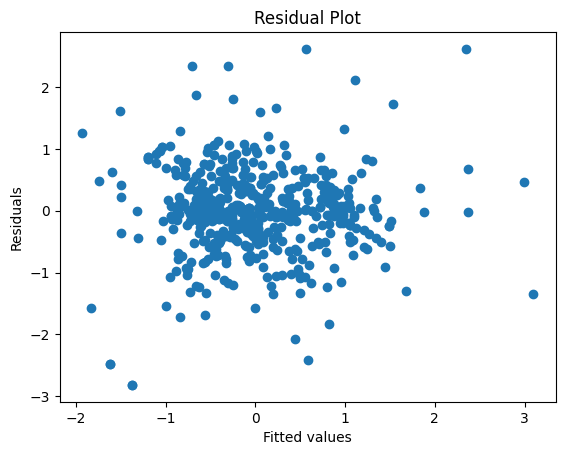

In [31]:
import matplotlib.pyplot as plt

# Get residuals
residuals = model.resid

# Plot residuals vs fitted values
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

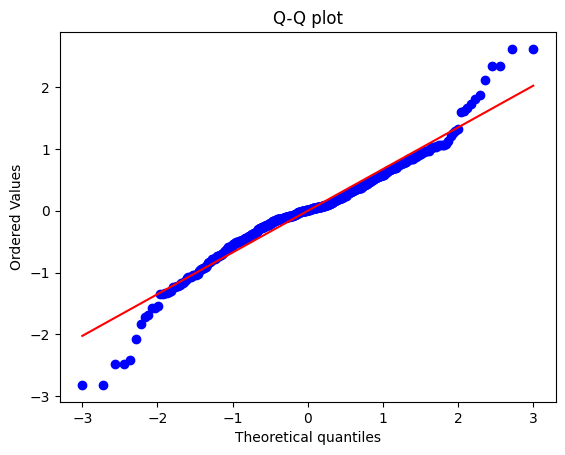

Shapiro-Wilk test p-value: 8.943498371497265e-11


In [32]:
import scipy.stats as stats

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)

In [26]:
# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan

lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X)
print("Breusch-Pagan test p-value:", f_p_value)

# https://fr.wikipedia.org/wiki/Test_de_Breusch-Pagan


Breusch-Pagan test p-value: 2.262713742268252e-11


In [27]:
# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_stat = durbin_watson(model.resid)
print("Durbin-Watson statistic:", durbin_watson_stat)

# https://fr.wikipedia.org/wiki/Test_de_Durbin-Watson


Durbin-Watson statistic: 1.8808615801924604


In [36]:

# Extract unique country names and years
countries = list(set([entry[0] for entry in data]))
years = list(set([entry[1] for entry in data]))

# Create figure and axis
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

# Initial year
current_year = years[0]

# Plot initial scatter
x, y = [], []
for entry in data:
    if entry[1] == current_year:
        x.append(entry[2])
        y.append(entry[3])
scatter = ax.scatter(x, y)

# Set labels and title
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')
ax.set_title(f'Scatter Plot ({current_year})')

# Add slider
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(ax_slider, 'Year', years[0], years[-1], valinit=current_year, valstep=1)

# Slider update function
def update(val):
    current_year = int(slider.val)
    ax.clear()
    x, y = [], []
    for entry in data:
        if entry[1] == current_year:
            x.append(entry[2])
            y.append(entry[3])
    scatter = ax.scatter(x, y)
    ax.set_xlabel('Variable 1')
    ax.set_ylabel('Variable 2')
    ax.set_title(f'Scatter Plot ({current_year})')
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()

NameError: name 'data' is not defined